In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats 

In [2]:
#Import Seasonal Data
data_nas = pd.read_csv('./mef-data/data_compiled_gapfilled_seasonal.csv')
data = data_nas.dropna().reset_index(drop = True)
data.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S
0,Growing,1969,29.24,0.000425,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.37,3.05
1,Melt,1969,17.84,0.003362,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.81,5.18
2,Snow,1969,32.48,0.000684,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.36,6.22
3,Growing,1970,13.43,0.000056,421.914022,0.0,16.641304,2.030,1.420,0.30,0.91,1.22,2.74
4,Melt,1970,15.63,0.002491,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.81,5.18


In [3]:
#Shift dates forward for lag 1 plots
data = data.sort_values(['year', 'season'], ascending = [True, False]).reset_index(drop = True)
data_lag1 = data[1:].reset_index(drop = True)
data_lag1['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag1[col] = data[col]

In [4]:
#Shift dates forward for lag 2 plots
data_lag2 = data[2:].reset_index(drop = True)
data_lag2['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag2[col] = data[col]

In [5]:
label = data.season
x = data.South_PCP
y = data.qInterval
set(label)
for i in set(label):
    temp_x = x[label == i]
    temp_y = y[label == i]
    print(scipy.stats.linregress(temp_x, temp_y))

LinregressResult(slope=3.2269140280561803e-05, intercept=-0.0003876238527779133, rvalue=0.5487166803321185, pvalue=0.0002981345091165445, stderr=8.082561153655047e-06, intercept_stderr=0.00023367195628159004)
LinregressResult(slope=3.0825830930266336e-05, intercept=0.0006289476781765682, rvalue=0.1941153168073497, pvalue=0.236368519766577, stderr=2.561024365335281e-05, intercept_stderr=0.0006444628407525801)
LinregressResult(slope=2.3386002488387066e-05, intercept=-0.0002269942799698044, rvalue=0.693383334778923, pvalue=9.922043776350362e-07, stderr=3.9953722497544534e-06, intercept_stderr=0.00010692004438269871)


C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\577366930.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag0.pdf',


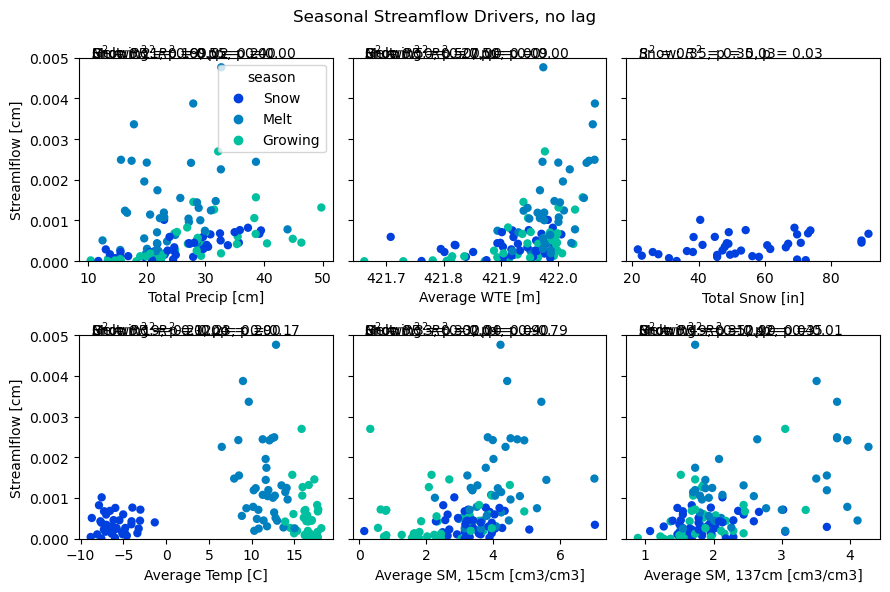

In [6]:
#Plots of seasonal variables affecting streamflow - no lags
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

def plotScatter(x, y, colors, label, axis, labels = False):
    sns.scatterplot(x = x, y = y, hue = colors,
                    palette = 'winter',
                    linewidth = 0,
                    ax = axis, legend = labels)
    axis.set_ylim(0, 0.005)
    axis.set_xlabel(label)
    _, _, r_value, p_value, _ = scipy.stats.linregress(x, y)
    axis.annotate(r"$R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(x), 0.005))
    for i in set(colors):
        temp_x = x[colors == i]
        temp_y = y[colors == i]
        if((len(temp_x) > 0)& (len(temp_y) > 0)):
            _, _, r_value, p_value, _ = scipy.stats.linregress(temp_x, temp_y)
            axis.annotate(i + r": $R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(x), 0.005))

plotScatter(data.South_PCP, data.qInterval, data.season, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data.WTE, data.qInterval, data.season, 'Average WTE [m]', ax[0, 1])
plotScatter(data.Snow_in[data.season == 'Snow'], data.qInterval[data.season == 'Snow'], data.season, 'Total Snow [in]', ax[0, 2])
plotScatter(data.MEANC, data.qInterval, data.season, 'Average Temp [C]', ax[1, 0])
plotScatter(data['d.15_S2E'], data.qInterval, data.season, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data['d.15_S2S'], data.qInterval, data.season,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data['d.137_S2E'], data.qInterval, data.season, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data['d.137_S2S'], data.qInterval, data.season, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, no lag')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag0.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\3078414245.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag1.pdf',


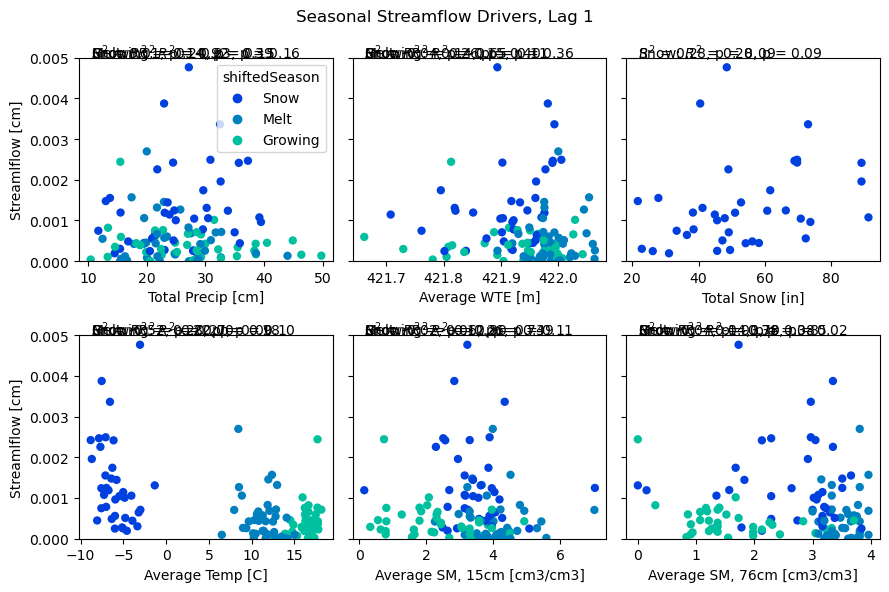

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag1.South_PCP, data_lag1.qInterval, data_lag1.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_lag1.WTE, data_lag1.qInterval, data_lag1.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag1.Snow_in[data_lag1.shiftedSeason == 'Snow'], data_lag1.qInterval[data_lag1.shiftedSeason == 'Snow'], data_lag1.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag1.MEANC, data_lag1.qInterval, data_lag1.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag1['d.15_S2E'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag1['d.15_S2S'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag1['d.76_S2E'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag1['d.76_S2S'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 1')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag1.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\288069713.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag2.pdf',


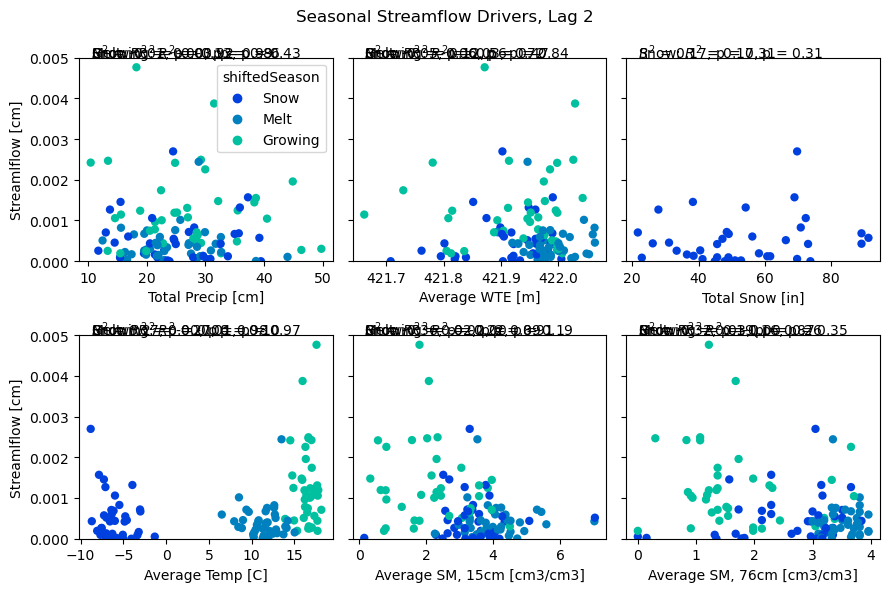

In [8]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag2.South_PCP, data_lag2.qInterval, data_lag2.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_lag2.WTE, data_lag2.qInterval, data_lag2.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag2.Snow_in[data_lag2.shiftedSeason == 'Snow'], data_lag2.qInterval[data_lag2.shiftedSeason == 'Snow'], data_lag2.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag2.MEANC, data_lag2.qInterval, data_lag2.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag2['d.15_S2E'], data_lag2.qInterval, data_lag2.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag2['d.15_S2S'], data_lag2.qInterval, data_lag2.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag2['d.76_S2E'], data_lag2.qInterval, data_lag2.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag2['d.76_S2S'], data_lag2.qInterval, data_lag2.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 2')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag2.pdf', 
            bbox_to_inches = 'tight')

Multi-lag plots

In [9]:
#Merge lagged dataframes with an indicator column for lag
data['lag'] = 0
data['shiftedSeason'] = data.season
data_lag1['lag'] = 1
data_lag2['lag'] = 2

data_merged = pd.concat([data, data_lag1, data_lag2]).reset_index(drop = True)
data_merged

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S,lag,shiftedSeason
0,Snow,1969,32.48,0.000684,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.360,6.220,0,Snow
1,Melt,1969,17.84,0.003362,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.810,5.180,0,Melt
2,Growing,1969,29.24,0.000425,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.370,3.050,0,Growing
3,Snow,1970,30.85,0.000659,422.005343,69.7,-7.075980,3.895,4.650,2.97,4.88,2.665,4.345,0,Snow
4,Melt,1970,15.63,0.002491,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.810,5.180,0,Melt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Growing,2015,11.78,0.000259,421.761625,33.4,-7.575000,3.150,3.730,3.23,4.17,2.180,3.450,2,Snow
344,Snow,2016,29.92,0.000713,421.893982,2.3,9.380531,5.310,5.130,3.56,5.03,2.770,4.170,2,Melt
345,Melt,2016,28.52,0.000710,421.887935,0.0,18.141304,3.960,3.710,1.37,1.88,1.880,2.840,2,Growing
346,Growing,2016,34.97,0.000670,421.901638,49.1,-3.009887,3.250,5.640,3.00,4.22,3.020,4.720,2,Snow


C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\298333978.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_melt.pdf',


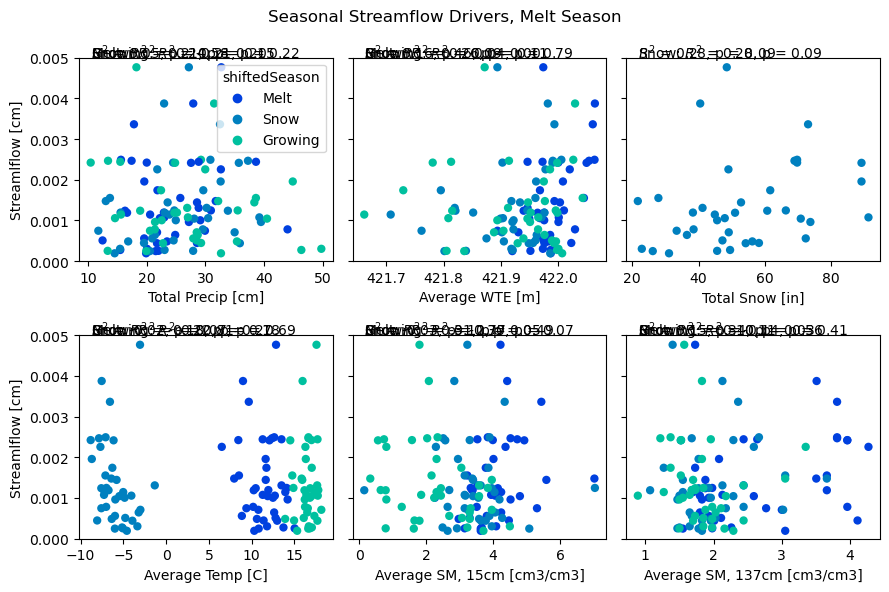

In [10]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_melt = data_merged[data_merged.season == 'Melt'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_melt.South_PCP, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_melt.WTE, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_melt.Snow_in[data_merged_melt.shiftedSeason == 'Snow'], data_merged_melt.qInterval[data_merged_melt.shiftedSeason == 'Snow'], data_merged_melt.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_melt.MEANC, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_melt['d.15_S2E'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_melt['d.15_S2S'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_melt['d.137_S2E'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_melt['d.137_S2S'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Melt Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_melt.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\669188092.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_grow.pdf',


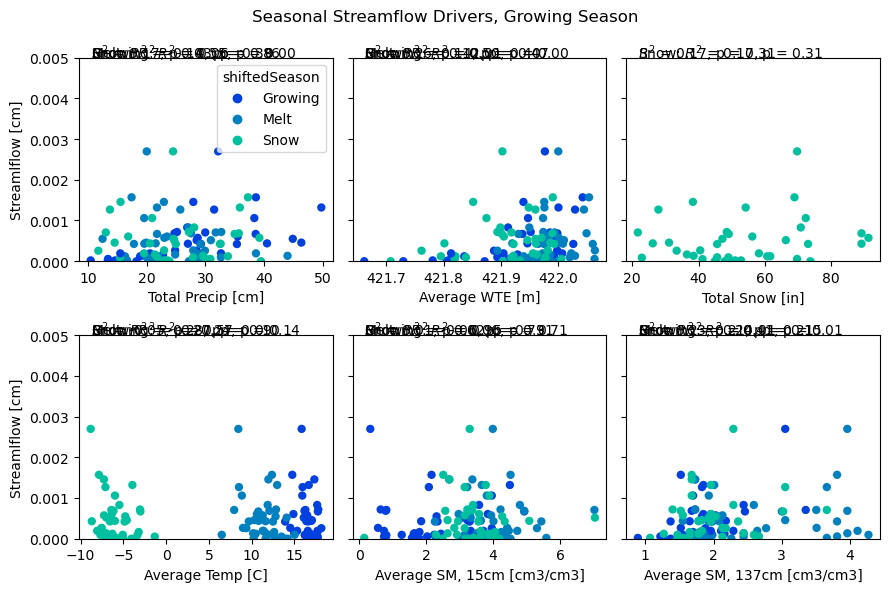

In [11]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_grow = data_merged[data_merged.season == 'Growing'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_grow.South_PCP, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_grow.WTE, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_grow.Snow_in[data_merged_grow.shiftedSeason == 'Snow'], data_merged_grow.qInterval[data_merged_grow.shiftedSeason == 'Snow'], data_merged_grow.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_grow.MEANC, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_grow['d.15_S2E'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_grow['d.15_S2S'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_grow['d.137_S2E'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_grow['d.137_S2S'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Growing Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_grow.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_836\386081141.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_snow.pdf',


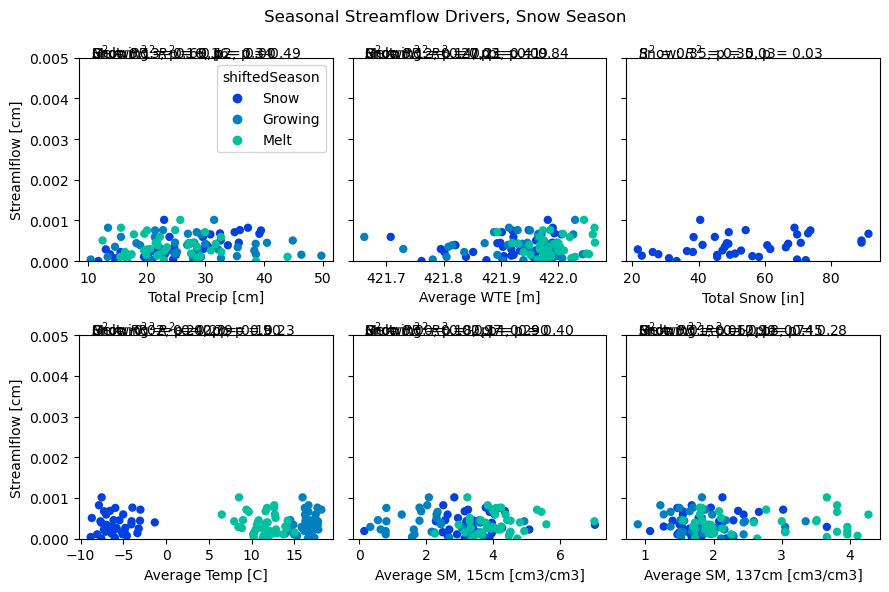

In [12]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_snow = data_merged[data_merged.season == 'Snow'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_snow.South_PCP, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_snow.WTE, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_snow.Snow_in[data_merged_snow.shiftedSeason == 'Snow'], data_merged_snow.qInterval[data_merged_snow.shiftedSeason == 'Snow'], data_merged_snow.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_snow.MEANC, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_snow['d.15_S2E'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_snow['d.15_S2S'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_snow['d.137_S2E'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_snow['d.137_S2S'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Snow Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_snow.pdf', 
            bbox_to_inches = 'tight')